# Image Processing 3 - Hough Line and Circle Transform Implementation


### منة الله محمد عبد الرحمن  1401443 / 43898
### menna.muhammed198@gmail.com

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import hypot, pi, cos, sin, ceil
import itertools
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0

In [2]:
def showImg(img):
    temp = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    testimageplot = plt.imshow(temp)
    return temp
def showImg2(img):
    temp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    testimageplot = plt.imshow(temp,'gray')
    return temp
def showImg3(img):
    temp = np.copy(img)
    testimageplot = plt.imshow(temp)
def contrast(img):
    image = (255-img)
    return image

## My implementation of Hough Lines

In [3]:
def HoughLines(eimg,rho,theta,votes):
    imgx, imgy = eimg.shape
    deg = theta * 180/pi
    diag = hypot(imgx, imgy)
    row = int(((1/deg)*180) + 1)
    col = int((1/rho)*ceil(diag))
    acc = np.zeros((col,row))
    #acc[rho][theta]
    for x in range(eimg.shape[0]):
        for y in range(eimg.shape[1]):
            if(eimg[x][y]==255):
                i = 0
                rho = 0
                while i <= 180:
                    ti = i * pi/180
                    tdeg = int((i * 1)/deg)
                    prho = (x*cos(ti)) + (y*sin(ti))
                    trho = int(prho * rho)
                    acc[trho][tdeg] = acc[trho][tdeg] + 1
                    i = i + deg
    poss = []
    for t in range(acc.shape[0]):
        for p in range(acc.shape[1]):
            if(acc[t][p] >= votes):
                poss.append([t,(p*deg)* pi/180])
    return poss

## Comparing effect of Hough Lines in openCV and my Hough Lines

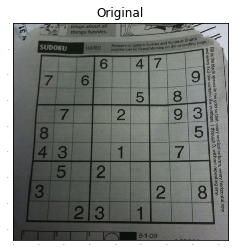

In [4]:
testimg = cv2.imread('sudoku-original.jpg')
x = showImg2(testimg)
xt = plt.title('Original')

## OpenCV version

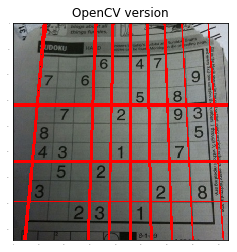

In [5]:
opcvimg = testimg.copy()
gray = cv2.cvtColor(opcvimg,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,pi/180,200)
for i in range(len(lines)):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(opcvimg,(x1,y1),(x2,y2),(0,0,255),2)
x = showImg2(opcvimg)
xt = plt.title('OpenCV version')

## My version

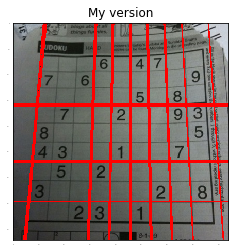

In [6]:
myimg = testimg.copy()
gray = cv2.cvtColor(myimg,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines1 = HoughLines(edges,1,pi/180,200)
for i in range(len(lines)):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(myimg,(x1,y1),(x2,y2),(0,0,255),2)
x = showImg2(myimg)
xt = plt.title('My version')

## My implementation of Hough Circles

In [106]:
def HoughCircles(img,aacc,bacc, minR, maxR, mvotes, votes):
    edges = cv2.Canny(img,100,200,apertureSize = 3)
    maxA = img.shape[0]
    maxB = img.shape[1]
    mir = minR
    mar = maxR
    poss =[]
    for r in range(mir,mar+1):
        acc = np.zeros((int(maxA/aacc),int(maxB/bacc)))
        for x in range(maxA):
            for y in range(maxB):
                if(edges[x][y]==255):
                    for th in range(0,360):
                        a = int((x - round(r* np.cos(th * np.pi/180)))/aacc)
                        b = int((y - round(r* np.sin(th * np.pi/180)))/bacc)
                        if(a >= 0 and b >=0 and a<maxA and b<maxB):
                            acc[a][b] += 1
        accMax = np.amax(acc)
        if(accMax>=mvotes):
            acc[acc < mvotes] = 0 
            for x in range(acc.shape[0]):
                for y in range(acc.shape[1]):
                    if(x > 0 and y > 0 and x < maxA-1 and y < maxB-1 and acc[x][y] >= mvotes):
                        Lsum = acc[x][y]+acc[x-1][y]+acc[x+1][y]+acc[x][y-1]+acc[x][y+1]+acc[x-1][y-1]+acc[x-1][y+1]+acc[x+1][y-1]+acc[x+1][y+1]
                        avgSum = np.float32((Lsum/9))
                        if(avgSum >= votes):
                            poss.append([x,y,r])
                            acc[x:x+5,y:y+7] = 0
    return poss


## Comparing effect of Hough Circles in openCV and my Hough Circles

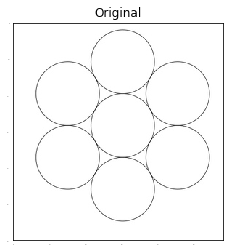

In [17]:
testimg1 = cv2.imread('circle.jpg',0)
x = showImg2(testimg1)
xt = plt.title('Original')

## OpenCV version

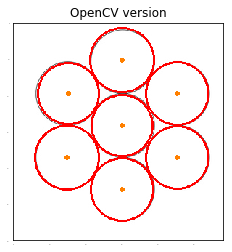

In [40]:
opcvimg1 = testimg1.copy()
opout = cv2.cvtColor(opcvimg1,cv2.COLOR_GRAY2BGR)
circ = cv2.HoughCircles(opcvimg1,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=35,minRadius=0,maxRadius=0)
if circ is not None:
    circ = np.round(circ[0, :]).astype("int")
    for (x, y, r) in circ:
        cv2.circle(opout, (x, y), r, (0,0,255), 2)
        cv2.rectangle(opout, (x - 1, y - 1), (x + 1, y + 1), (0, 128, 255), 3)
y = showImg2(opout)
yt = plt.title('OpenCV version')


## My version

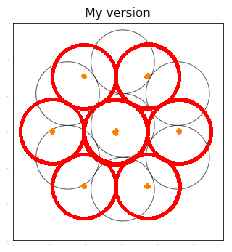

In [107]:
myimg1 = testimg1.copy()
myout = cv2.cvtColor(myimg1,cv2.COLOR_GRAY2BGR)
mycirc = HoughCircles(myimg1,1,1, 40, 45, 150 ,15)
count = 0
if mycirc is not None:
    #mycirc = np.round(mycirc[0, :]).astype("int")
    for (x, y, r) in mycirc:
        cv2.circle(myout, (x, y), r, (0,0,255), 2)
        cv2.rectangle(myout, (x - 1, y - 1), (x + 1, y + 1), (0, 128, 255), 3)
y = showImg2(myout)
yt = plt.title('My version')